In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
s = 64
# reading the classes, labels, and images
label = []
d = '../input/iot-malware/IOT_Malware_dataset'#'/content/drive/MyDrive/malimg'
for filename in os.listdir(d):
  label.append(filename)
data = []
classes = []
for l in label: 
    path = os.path.join(d, l)
    for img in os.listdir(path):
        try:
          img_arr = cv2.imread(os.path.join(path, img))# cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (s, s)) # Reshaping images to preferred size
          data.append(resized_arr)
          classes.append(label.index(l))
        except Exception as e:
          print(e)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

<class 'numpy.ndarray'>
data shape: (17219, 64, 64, 3)
<class 'numpy.ndarray'>
classes shape: (17219,)
[[[0.41176471 0.36862745 0.53333333]
  [0.56078431 0.8627451  0.77647059]
  [0.2627451  0.30588235 0.28235294]
  ...
  [0.75294118 0.91372549 0.74117647]
  [0.45098039 0.32941176 0.49411765]
  [0.42352941 0.43137255 0.46666667]]

 [[0.65882353 0.61960784 0.61176471]
  [0.57254902 0.82745098 0.50196078]
  [0.43137255 0.64313725 0.75686275]
  ...
  [0.59607843 0.68235294 0.56470588]
  [0.47058824 0.57254902 0.63921569]
  [0.37254902 0.64705882 0.35686275]]

 [[0.60784314 0.47843137 0.69411765]
  [0.38823529 0.44313725 0.36078431]
  [0.32156863 0.47843137 0.38431373]
  ...
  [0.29019608 0.37254902 0.45490196]
  [0.50196078 0.45490196 0.53333333]
  [0.41176471 0.27058824 0.4745098 ]]

 ...

 [[0.20392157 0.27843137 0.34117647]
  [0.3372549  0.39607843 0.4       ]
  [0.17647059 0.01960784 0.09803922]
  ...
  [0.49019608 0.54901961 0.42352941]
  [0.15686275 0.24705882 0.30196078]
  [0.47450

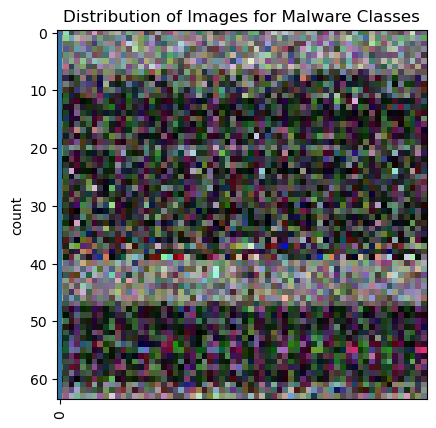

In [3]:
from keras.utils import to_categorical
# plotting the number of images in classes
plt.title('Distribution of Images for Malware Classes')
g = sns.countplot(classes)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

# converting to numpy array
data = np.array(data)
classes = np.array(classes)

# normalizing the data
data = data/255.0

# checking the type and shape of data and classes
print(type(data))
print('data shape:', data.shape)
print(type(classes))
print('classes shape:', classes.shape)

#looking at the first image
index = 0
print(data[index])
#looking as an image
img = plt.imshow(data[index])
#printing the label of the image
print('The image label is: ', classes[index])
#print the image class
print('The image class is: ', label[classes[index]])

classes_cat = to_categorical(classes)
#print all of the new labels
print(classes_cat)
#print an example of the new labels
print(classes_cat[0])

# splitting data in training and testing with test size of 0.2
x_train, x_test, y_train, y_test = train_test_split(data, classes_cat, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 0)
# converting x_train and x_test to numpy array and reshaped array to -1, 32, 32, 1
x_train = x_train.reshape(-1, s, s, 3)
y_train = np.array(y_train)
x_val = x_val.reshape(-1, s, s, 3)
y_val = np.array(y_val)
x_test = x_test.reshape(-1, s, s, 3)
y_test = np.array(y_test)

In [4]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,DepthwiseConv2D,BatchNormalization
from tensorflow.keras import layers 
from keras.utils import to_categorical 
from keras.layers import LeakyReLU, ReLU
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
epoch = 100
batch_size = 64

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
   # tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=512, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=512, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512),
    #tf.keras.layers.Relu(),
    tf.keras.layers.Dense(2, activation='softmax')
])


# compiling and printing the summary of model built
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 depthwise_conv2d (Depthwise  (None, 64, 64, 32)       320       
 Conv2D)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        2112      
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 64, 64, 64)       640       
 seConv2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       8320      
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 64, 64, 128)      1

In [6]:
# fitting the model and evaluating
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(x_val, y_val))#validation_split = 0.1
model.evaluate(x_test, y_test)[1]    

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


182/182 [==============================] - 78s 351ms/step - loss: 0.4795 - accuracy: 0.8501 - val_loss: 0.3981 - val_accuracy: 0.8650
Epoch 2/100
182/182 [==============================] - 60s 332ms/step - loss: 0.4160 - accuracy: 0.8541 - val_loss: 0.3982 - val_accuracy: 0.8650
Epoch 3/100
182/182 [==============================] - 60s 331ms/step - loss: 0.4162 - accuracy: 0.8541 - val_loss: 0.3959 - val_accuracy: 0.8650
Epoch 4/100
182/182 [==============================] - 60s 331ms/step - loss: 0.4162 - accuracy: 0.8541 - val_loss: 0.3957 - val_accuracy: 0.8650
Epoch 5/100
182/182 [==============================] - 60s 331ms/step - loss: 0.4160 - accuracy: 0.8541 - val_loss: 0.3969 - val_accuracy: 0.8650
Epoch 6/100
182/182 [==============================] - 60s 331ms/step - loss: 0.4164 - accuracy: 0.8541 - val_loss: 0.3960 - val_accuracy: 0.8650
Epoch 7/100
182/182 [==============================] - 60s 331ms/step - loss: 0.4165 - accuracy: 0.8541 - val_loss: 0.3960 - val_accurac

0.9372822046279907